# 1. Imports of essential modules/ Global settings

### 1.1 Modules

In [793]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import scipy

### 1.2 Plots' settings

In [881]:
plt.style.use("dark_background")
color_list = ["#f1f1f1", "#32CD32", "#00CED1", "#FF1493"]

# 2. Data upload from an external file & preprocessing raw data

### 2.1 Reading a file

In [795]:
df = pd.read_csv("./data/ALL_GPUs.CSV")

### 2.2 Selecting interesting parameters(columns)

In [796]:
columns = ["Best_Resolution", "Core_Speed", "Manufacturer", "Memory", "Memory_Bandwidth", 
           "Memory_Bus", "Memory_Speed","Release_Date"]

In [797]:
df = df[columns]

### 2.3 Adding an additional columns - Release based on an exact date

In [798]:
df['Release_Date'] = df['Release_Date'].str[1:-1]
df=df[df['Release_Date'].str.len()==11]
df['Release_Date'] = pd.to_datetime(df['Release_Date'], format='%d-%b-%Y')

In [799]:
release_year = df['Release_Date'].dt.year
release_month = df['Release_Date'].dt.month
release_day = df['Release_Date'].dt.day
df['Release_Year'] = release_year
df['Release'] = release_year + release_month/12 + release_day/30.4375 #30.4375 -> mean of all days in a single month

# 3. Memory speed 

### 3.1 Modification of original DataFrame

In [800]:
df['Memory_Speed_Value'] = df['Memory_Speed'].str[0:-3].fillna(0).astype(int)
df.head(5)

,Best_Resolution,Core_Speed,Manufacturer,Memory,Memory_Bandwidth,Memory_Bus,Memory_Speed,Release_Date,Release_Year,Release,Memory_Speed_Value
0,NaN,738 MHz,Nvidia,1024 MB,64GB/sec,256 Bit,1000 MHz,2009-03-01,2009,2009.282854,1000
1,1366 x 768,\n-,AMD,512 MB,106GB/sec,512 Bit,828 MHz,2007-05-14,2007,2007.876626,828
2,1366 x 768,\n-,AMD,512 MB,51.2GB/sec,256 Bit,800 MHz,2007-12-07,2007,2008.229979,800
3,1024 x 768,\n-,AMD,256 MB,36.8GB/sec,128 Bit,1150 MHz,2007-07-01,2007,2007.616188,1150
4,1024 x 768,\n-,AMD,256 MB,22.4GB/sec,128 Bit,700 MHz,2007-06-28,2007,2008.419918,700


### 3.2 Creating numpy arrays from DataFrame & counting mean for MSV per each year

In [801]:
X = df.iloc[:, [9]].values # 9 - columns index of Memory_Speed_Value
Y = df.iloc[:, 10].values  # 10 - MSV 

X_discrete = df.iloc[:, [8]].values
X_discrete = np.unique(X_discrete)
X_discrete = X_discrete.reshape(-1, 1)

In [802]:
Y_avg = []
for year in X_discrete:
    mean = df[df['Release_Year'] == year[0]]['Memory_Speed_Value'].mean()
    Y_avg.append(mean)
Y_avg = np.array(Y_avg)

### 3.3 Visualisation of full data on a plot & the mean of GPU memory speed value per each year

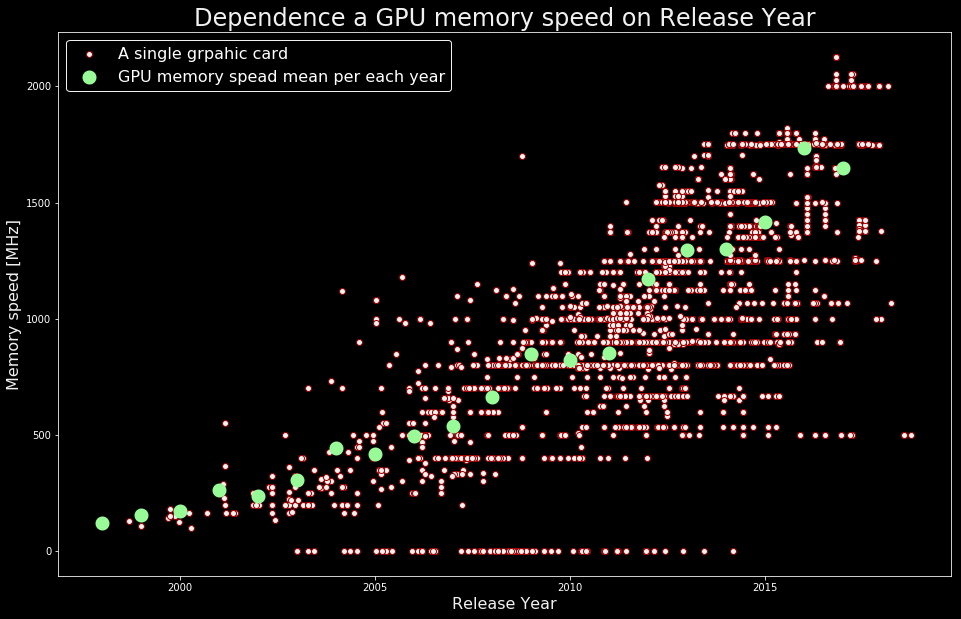

In [803]:
plt.figure(figsize=(16, 10))
plt.scatter(x = X, y = Y, c = "#f1f1f1", edgecolors = "#990000", label = "A single grpahic card")
plt.scatter(x = X_discrete, y = Y_avg, c = "#98FB98", edgecolors = "#98FB98", linewidth = 8, label = "GPU memory spead mean per each year")
plt.legend()
plt.title("Dependence a GPU memory speed on Release Year", fontsize = 24, color = "#f1f1f1")
plt.legend(loc=2, prop={'size': 16}, frameon=True,shadow=True, edgecolor="#f1f1f1")
plt.xlabel("Release Year", fontsize = 16, color = "#f1f1f1")
plt.ylabel("Memory speed [MHz]", fontsize = 16, color = "#f1f1f1")
plt.show()

### 3.3 Creating a polynonomial regressor(model) to predict the growth of GPU memory speed


In [804]:
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_discrete)
poly_reg.fit(X_poly, Y_avg)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y_avg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### 3.4 Visualisation of a model

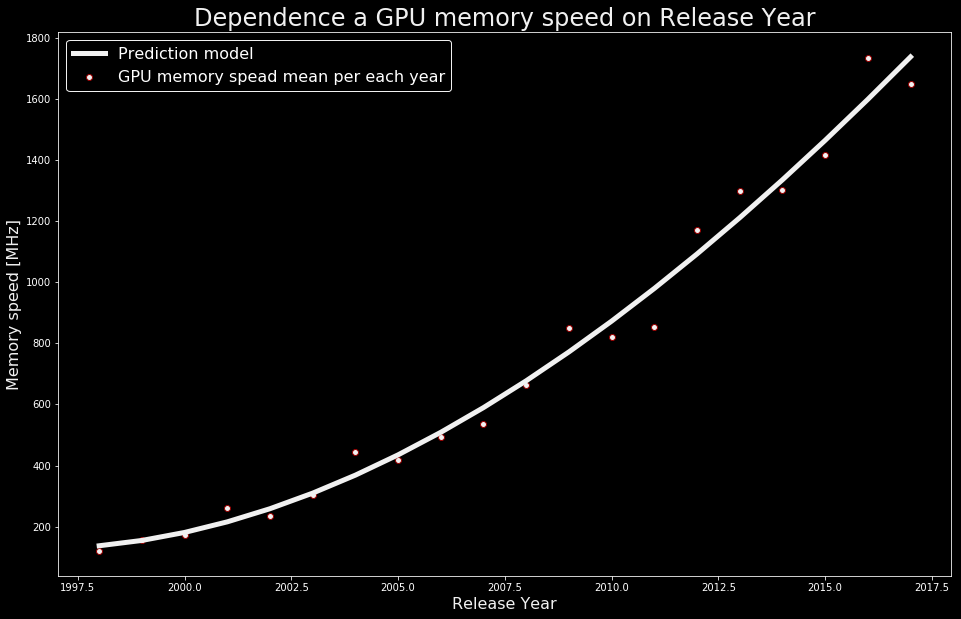

In [805]:
plt.figure(figsize=(16, 10))
plt.scatter(x = X_discrete, y = Y_avg, c = "#f1f1f1", edgecolors = "#990000", label = "GPU memory spead mean per each year")
plt.plot(X_discrete, lin_reg_2.predict(poly_reg.fit_transform(X_discrete)), color = '#f1f1f1', linewidth = 5, label = "Prediction model")
plt.legend(loc=2, prop={'size': 16}, frameon=True,shadow=True, edgecolor="#f1f1f1")
plt.title("Dependence a GPU memory speed on Release Year", fontsize = 24, color = "#f1f1f1")
plt.xlabel("Release Year", fontsize = 16, color = "#f1f1f1")
plt.ylabel("Memory speed [MHz]", fontsize = 16, color = "#f1f1f1")
plt.show()

# 4. Memory vs Release Year Research

### 4.1 Preparing a helping column in calculation

In [806]:
df['Memory_Value'] = df['Memory'].str[0:-3].fillna(0).astype(int) #Cutting of the unit (MB and other white signs like space)
df.head(5)

,Best_Resolution,Core_Speed,Manufacturer,Memory,Memory_Bandwidth,Memory_Bus,Memory_Speed,Release_Date,Release_Year,Release,Memory_Speed_Value,Memory_Value
0,NaN,738 MHz,Nvidia,1024 MB,64GB/sec,256 Bit,1000 MHz,2009-03-01,2009,2009.282854,1000,1024
1,1366 x 768,\n-,AMD,512 MB,106GB/sec,512 Bit,828 MHz,2007-05-14,2007,2007.876626,828,512
2,1366 x 768,\n-,AMD,512 MB,51.2GB/sec,256 Bit,800 MHz,2007-12-07,2007,2008.229979,800,512
3,1024 x 768,\n-,AMD,256 MB,36.8GB/sec,128 Bit,1150 MHz,2007-07-01,2007,2007.616188,1150,256
4,1024 x 768,\n-,AMD,256 MB,22.4GB/sec,128 Bit,700 MHz,2007-06-28,2007,2008.419918,700,256


### 4.2 Preprocessing data & creating a np.array object

In [883]:
X = df['Release'].values #np array of years
Y = df['Memory_Value'].fillna(0).values # np array of MV
X = X.reshape(-1, 1)

### 4.3 Creating a regressor 

#### 4.3.1 Polynonomial regressors (2th & 4th to compare)

In [891]:
X_discrete = df.iloc[:, [8]].values
X_discrete = np.unique(X_discrete)
X_discrete = X_discrete.reshape(-1, 1)

Y_avg = []
for year in X_discrete:
    mean = df[df['Release_Year'] == year[0]]['Memory_Value'].mean()
    Y_avg.append(mean)
Y_avg = np.array(Y_avg)

In [897]:
degree_list = [2, 4]
regressors_list = []
poly_reg_list = []
for degree in degree_list:
    poly_reg = PolynomialFeatures(degree = degree)
    X_poly = poly_reg.fit_transform(X)
    poly_reg.fit(X_poly, Y)

    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, Y)
    
    poly_reg_list.append(poly_reg)
    regressors_list.append(lin_reg)


### 4.3 Visualisation

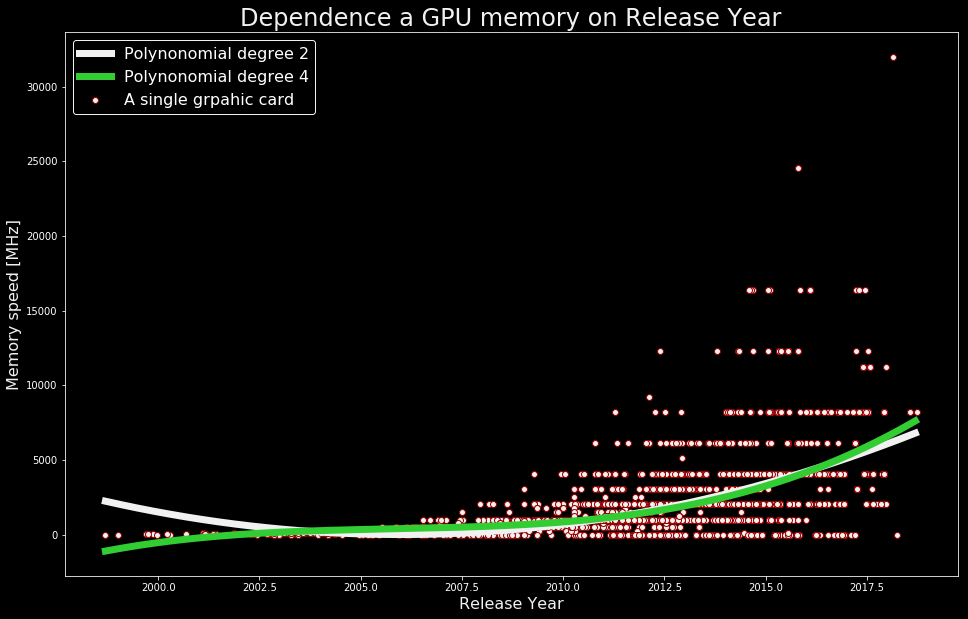

In [898]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.figure(figsize=(16, 10))
plt.scatter(x = X, y = Y, c = "#f1f1f1", edgecolors = "#990000", label = "A single grpahic card")
for i in range(0, len(regressors_list)):
    plt.plot(X_grid, regressors_list[i].predict(poly_reg_list[i].fit_transform(X_grid)) , label = "Polynonomial degree {}".format(degree_list[i]), linewidth = 7, color = color_list[i])
plt.title("Dependence a GPU memory on Release Year", fontsize = 24, color = "#f1f1f1")
plt.legend(loc=2, prop={'size': 16}, frameon=True,shadow=True, edgecolor="#f1f1f1")
plt.xlabel("Release Year", fontsize = 16, color = "#f1f1f1")
plt.ylabel("Memory speed [MHz]", fontsize = 16, color = "#f1f1f1")
plt.show()